![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [13]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [14]:
# Create dummy variables for the 'sex' column
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

# Display the first few rows of the updated dataframe
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


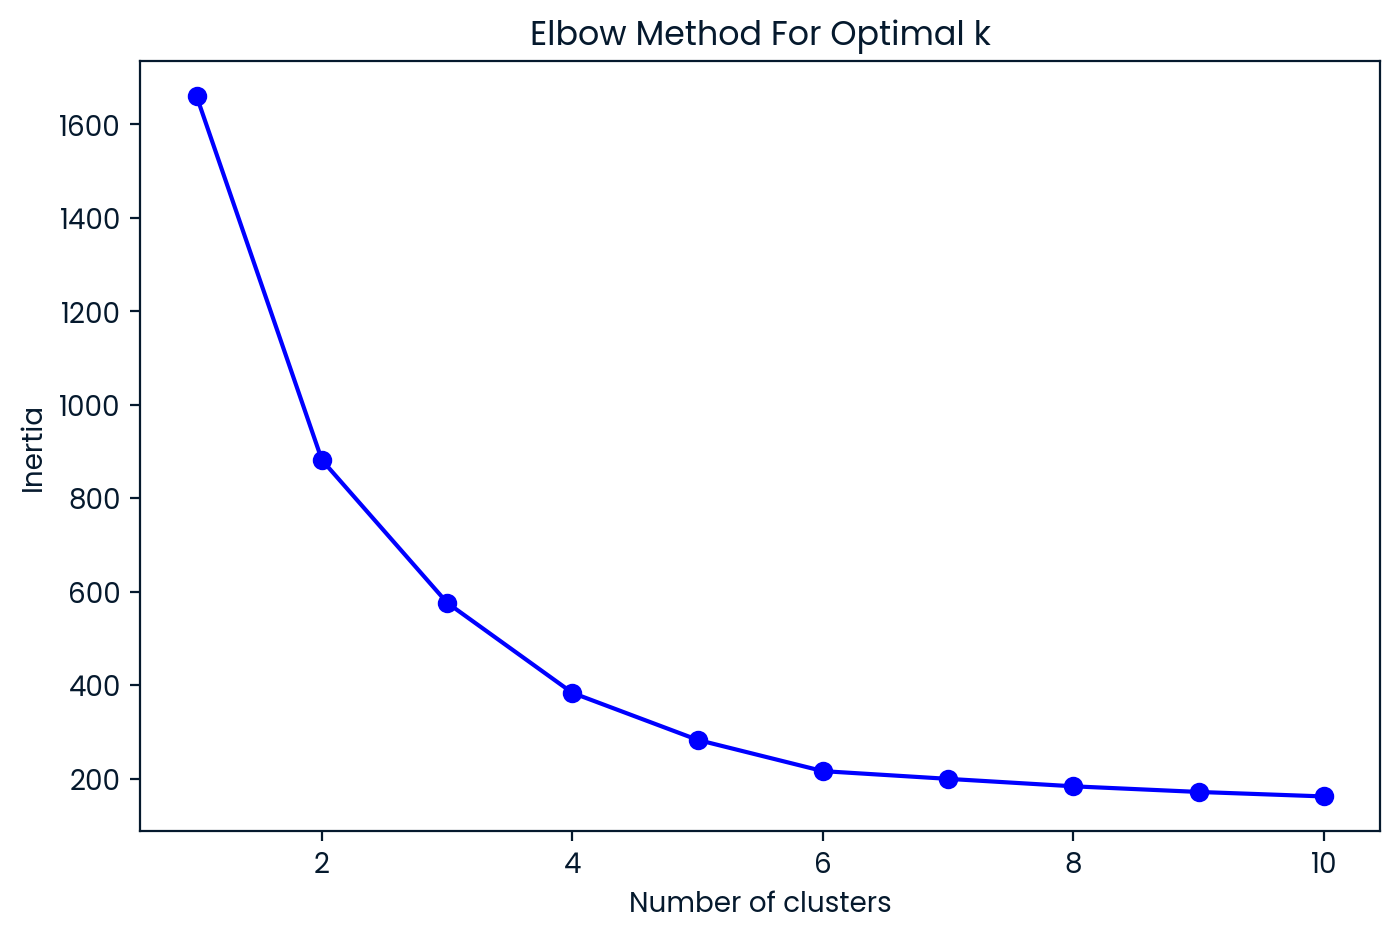

In [15]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins_df)

# Perform Elbow analysis to determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
# Based on the Elbow method
optimal_clusters = 4

# Run KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataframe
penguins_df['cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
3,36.7,19.3,193.0,3450.0,0,2
4,39.3,20.6,190.0,3650.0,1,0


In [17]:
# Create a final characteristic DataFrame for each cluster
stat_penguins = penguins_df.groupby('cluster').mean()

# Display the characteristic DataFrame
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
cluster,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,45.563793,14.237931,212.706897,4679.741379,0.0
2,40.217757,17.611215,189.046729,3419.158879,0.0
3,49.473770,15.718033,221.540984,5484.836066,1.0
